In [ ]:
'''
案例一主要是基于“中国人民共和国地市级党委书记数据库(2000-2010) ”数据进行数据挖掘，该数据库由
复旦大学经济学院陈硕副教授及其团队(Fudan WTF Social Science Lab)成员整理，主要研究问题如下：
1、性别构成
2、年龄情况、专业情况
3、任期情况

课程技术点：
数据读取及查看 / 数据清洗 / 数据分析 / 图表制作

参考文章：
《如何成为一位市委书记？》，链接：http://mp.weixin.qq.com/s/K09ybCQGoGzf_ckDGYMfmA

加油！
'''

In [ ]:
'''
Part1  数据读取及查看
'''

In [1]:
# 先将.xls文件导出成.csv文件
# 注意：以下一切代码均为英文输入法，包括标点符号等！！

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
# numpy：科学计算工具包
# pandas：数据分析工具包
# malplotlib：图表绘制工具包
# improt语句：加载工具包

data = pd.read_csv("C:\\Users\\Hjx\\Desktop\\地市级党委书记数据库（2000-10）.csv",encoding = "gbk",engine = 'python')
print(data)
# 加载csv数据，并且将数据赋予data变量
# 这里用到了pandas的工具包，读取数据之后的格式为Dataframe，是一种矩阵格式（execl的数据表格其实也是一种矩阵格式）
# pyhton中，创造一个变量的方法就是给其赋值，而“=”代表 变量赋值
# print()是python最基本的语句之一，代表“打印内容”

# 注意，对于读取文件报错情况，可尝试以下方法：
# ① excel转csv时，可设置编码为utf-8，并更改参数 → encoding = 'utf-8'
# ② mac导出csv时，可以更改参数 → encoding = "gb18030"
# ③ 可将文件名改为英文文件名，例如“data.csv”

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Hjx\\Desktop\\地市级党委书记数据库（2000-10）.csv'

In [2]:
print(data.head(10))
print('----------')
# 查看前十个数据
# 这里注意了：python的序号从0开始，所以前十个数据的序号为 0-9
# "print('----------')" 画一个分隔线

print(data[10:20])
print('----------')
# 查看数据序号10-20个数据（也就是第11至第21个数据）

print(data['党委书记姓名'])
print('----------')
# 查看“党委书记姓名”字段的所有数据

   省级政区代码 省级政区名称  地市级政区代码 地市级政区名称    年份 党委书记姓名  出生年份  出生月份  籍贯省份代码 籍贯省份名称  \
0  130000    河北省   130100    石家庄市  2000    陈来立   NaN   NaN     NaN    NaN   
1  130000    河北省   130100    石家庄市  2001    吴振华   NaN   NaN     NaN    NaN   
2  130000    河北省   130100    石家庄市  2002    吴振华   NaN   NaN     NaN    NaN   
3  130000    河北省   130100    石家庄市  2003    吴振华   NaN   NaN     NaN    NaN   
4  130000    河北省   130100    石家庄市  2004    吴振华   NaN   NaN     NaN    NaN   
5  130000    河北省   130100    石家庄市  2005    吴振华   NaN   NaN     NaN    NaN   
6  130000    河北省   130100    石家庄市  2006    吴振华   NaN   NaN     NaN    NaN   
7  130000    河北省   130100    石家庄市  2007    吴显国   NaN   NaN     NaN    NaN   
8  130000    河北省   130100    石家庄市  2008    吴显国   NaN   NaN     NaN    NaN   
9  130000    河北省   130100    石家庄市  2009     车俊   NaN   NaN     NaN    NaN   

   ...    民族  教育 是否是党校教育（是=1，否=0） 专业：人文 专业：社科  专业：理工  专业：农科  专业：医科  入党年份  工作年份  
0  ...   NaN  硕士              1.0   NaN   NaN    NaN    NaN    NaN   Na

In [7]:
field = data.columns.tolist()
print(type(field))
print('----------')
print(field)
# 创造一个变量field，赋值为数据data的字段
# type()是输出数据类型，这里的类型为“列表list”，python核心数据类型之一

<class 'list'>
----------
['省级政区代码', '省级政区名称', '地市级政区代码', '地市级政区名称', '年份', '党委书记姓名', '出生年份', '出生月份', '籍贯省份代码', '籍贯省份名称', '籍贯地市代码', '籍贯地市名称', '性别', '民族', '教育', '是否是党校教育（是=1，否=0）', '专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科', '入党年份', '工作年份']


In [23]:
print(data.describe(include=[np.number]))
print('----------')
# .describe()返回基本数据信息
# .describe(include=[np.number])只统计数值类型
# ()中没有任何参数时，会默认只统计数值类型的字段内容，包括：计数，平均数，方差，最小值，最大值，四分位数，若其中有字符串数据会报错

print(data.describe(include=[np.object]))
# 这里代表只统计字符串类型的字段内容：计数，唯一值数量，出现频率最高的内容，最高出现频率

              省级政区代码        地市级政区代码           年份         出生年份         出生月份  \
count    3663.000000    3663.000000  3663.000000  2676.000000  2645.000000   
mean   403393.393393  404456.756757  2005.000000  1953.622571     6.790548   
std    148176.721620  148485.810327     3.162709     4.416316     3.614664   
min    130000.000000  130100.000000  2000.000000  1941.000000     1.000000   
25%    330000.000000  330100.000000  2002.000000          NaN          NaN   
50%    420000.000000  420200.000000  2005.000000          NaN          NaN   
75%    510000.000000  513400.000000  2008.000000          NaN          NaN   
max    650000.000000  654300.000000  2010.000000  1966.000000    14.000000   

              籍贯省份代码         籍贯地市代码  是否是党校教育（是=1，否=0）        专业：人文  \
count    2624.000000    2615.000000       2493.000000  2370.000000   
mean   364428.353659  365742.332696          0.430405     0.275527   
std    126267.485520  125961.993399          0.576136     0.446874   
min    110000.000

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [ ]:
'''
Part2  问题一_性别构成
'''

In [10]:
# 市委书记性别比例

data_gender = data['性别']
print(data_gender.head())
print('----------')
# 新建变量data_gender，赋值所有性别数据

data_gender_re = data_gender[data_gender.notnull()]
print(data_gender_re.head())
print(data_gender_re.unique())
print('----------')
# 删除所有缺失值（NaN），生成新的数据data_gender_re
# .unique()表示显示数据的唯一值内容

count = len(data_gender_re)
count_m = len(data_gender_re[data_gender_re == '男'])
count_w = len(data_gender_re[data_gender_re == '女'])
rate_m = count_m/count
rate_w = count_w/count
print('样本量：' + str(count) + "\n",
      '男性样本量：' + str(count_m) + "\n",
      '女性样本量：' + str(count_w) + "\n",
      '男性比例：' + str(rate_m*100)[:4] + '%' + "\n",
      '女性比例：' + str(rate_w*100)[:4] + '%'
        )
print('----------')
# "=="代表判断：左边是否等于右边
# str()：将数值型转换为字符型
# "\n" 代表提行
# 百分号的书写，可以用简单的方法 —— 格式化字符:
# print( '女性比例：%.2f%%' % (rate_w*100))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: 性别, dtype: object
----------
121    男
122    男
123    男
124    男
125    男
Name: 性别, dtype: object
['男' '女']
----------
样本量：2708
 男性样本量：2633
 女性样本量：75
 男性比例：97.2%
 女性比例：2.76%
----------


In [11]:
# 按省份分析市委书记女性比例

data_gender2 = data[['省级政区名称','性别']]
data_gender2_re = data_gender2[data_gender2['性别'].notnull()]
print(data_gender2_re.head())
print('----------')
# 新建变量data_gender2，字段包括省份、性别
# 去除缺失值

pt = pd.crosstab(data_gender2_re['省级政区名称'], data_gender2_re['性别'])
print(pt.head())
print('----------')
# 按照省份统计出男女人数
# crosstab(行，列)用于针对字符串数据的透视（类似excel的数据透视）

pt['女性占比'] =  pt['女'] / (pt['女'] + pt['男'])
pt2 = pt.sort_values(by = ['女性占比'], ascending = False)
print(pt2.head(10))
print('----------')
# 计算出女性占比
# 这里直接在pt数据中添加了一个新的字段“女性占比”
# sort_values()排序，ascending = False表示降序

    省级政区名称 性别
121    山西省  男
122    山西省  男
123    山西省  男
124    山西省  男
125    山西省  男
----------
性别       女    男
省级政区名称         
云南省      2   73
内蒙古自治区   0   86
吉林省      4   72
四川省      8  155
宁夏回族自治区  0   49
----------
性别       女    男      女性占比
省级政区名称                   
辽宁省     13  121  0.097015
陕西省      9   93  0.088235
吉林省      4   72  0.052632
山西省      6  112  0.050847
四川省      8  155  0.049080
安徽省      7  167  0.040230
江西省      4  113  0.034188
山东省      6  178  0.032609
福建省      3   96  0.030303
云南省      2   73  0.026667
----------


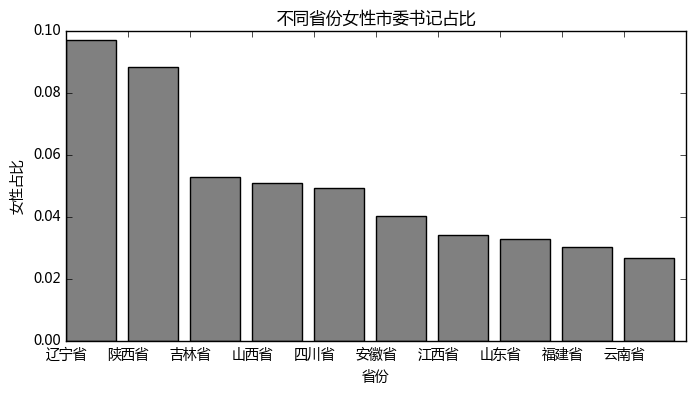

In [6]:
# 绘制图表1：不同省份女性市委书记占比

fig_q1_1 = plt.figure(figsize = (8,4))
# 创建一个图表，大小为8*4

index = pt2.index[:10]
plt.bar(range(10),  # 横坐标
        pt2['女性占比'][:10], # 纵坐标
        tick_label=index, # 横轴标签
        color = 'gray' )  # 颜色
plt.title('不同省份女性市委书记占比')
plt.xlabel('省份')
plt.ylabel('女性占比')
plt.show()
# 创建柱状图，plt(横坐标，纵坐标),tick_label-标签
# 参数添加
# plt.show()：显示图表

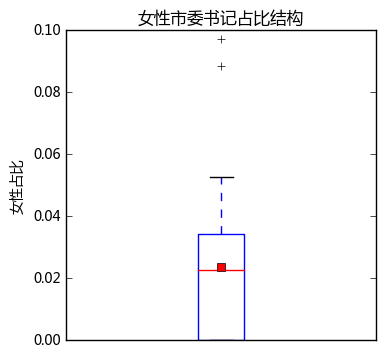

In [12]:
# 绘制图表2：女性市委书记占比结构

fig_q1_2 = plt.figure(figsize = (4,4))
# 创建一个图表，大小为4*4

plt.boxplot(pt2['女性占比'], # 值
            vert=True, # true：纵向，false：横向
            showmeans = True) # 显示均值
plt.title('女性市委书记占比结构')
plt.xticks([])
plt.ylabel('女性占比')
plt.show()
# 创建箱形图：四分位数，上下边缘值（非最大最小值），异常值
# 参数添加
# plt.show()：显示图表

In [ ]:
'''
Part3  问题二_年龄情况、专业情况
'''

In [15]:
# 年龄情况：整体年龄分布 / 入职年龄分布 / 卸任年龄分布

data_age = data[['出生年份','党委书记姓名','年份']]
data_age_re = data_age[data_age['出生年份'].notnull()]
print(data_age_re.head())
print(data_age_re['出生年份'].unique())
print(data_age_re.describe())
print('----------')
# 新建变量data_age，赋值包括年份、出生年份字段内容
# 清除缺失值

df1 = 2017 - data_age_re['出生年份']
print(df1.head())
print('----------')
# 计算出整体年龄数据

df_yearmin = data_age_re[['党委书记姓名','年份']].groupby(data_age_re['党委书记姓名']).min()
df2 = df_yearmin['年份'].groupby(df_yearmin['年份']).count()
print(df2)
print('----------')
# 计算出入职年龄数据

df_yearmax = data_age_re[['党委书记姓名','年份']].groupby(data_age_re['党委书记姓名']).max()
df3 = df_yearmax['年份'].groupby(df_yearmax['年份']).count()
print(df3)
print('----------')
# 计算出卸任年龄数据

       出生年份 党委书记姓名    年份
121  1945.0    侯伍杰  2000
122  1945.0    侯伍杰  2001
123  1950.0    云公民  2002
124  1950.0    云公民  2003
125  1950.0    云公民  2004
[ 1945.  1950.  1956.  1949.  1952.  1957.  1953.  1960.  1955.  1951.
  1954.  1948.  1947.  1946.  1944.  1962.  1964.  1942.  1963.  1958.
  1965.  1943.  1961.  1959.  1941.  1966.]
              出生年份           年份
count  2676.000000  2676.000000
mean   1953.622571  2005.214499
std       4.416316     3.046486
min    1941.000000  2000.000000
25%    1951.000000  2003.000000
50%    1954.000000  2005.000000
75%    1956.000000  2008.000000
max    1966.000000  2010.000000
----------
121    72.0
122    72.0
123    67.0
124    67.0
125    67.0
Name: 出生年份, dtype: float64
----------
年份
2000    190
2001     69
2002     65
2003     88
2004     51
2005     55
2006     50
2007     59
2008     99
2009     23
Name: 年份, dtype: int64
----------
年份
2000     47
2001     44
2002     71
2003     38
2004     48
2005     49
2006     58
2007    105
2008     25

In [14]:
# 专业情况：专业结构 / 专业整体情况 / 专业大类分布 

data_major = data[['党委书记姓名','年份','专业：人文','专业：社科','专业：理工','专业：农科','专业：医科']]
data_major_re = data_major[data_major['专业：人文'].notnull()]
print(data_major_re.head())
print(data_major_re.describe())
print('----------')
# 新建变量data_major，赋值包括年份、专业等字段内容，其中1代表是，0代表否
# 清除缺失值

data_major_re['专业'] = data_major_re[['专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科']].idxmax(axis=1)
print(data_major_re.head())
print('----------')
# 统计每个人的专业

data_major_st = data_major_re[['专业','党委书记姓名']].drop_duplicates()
print(data_major_st.head())
print('----------')
# 去重

df4 = data_major_st['专业'].groupby(data_major_st['专业']).count()
print(df4)
print('----------')
# 计算出学历结构数据

df5 = pd.crosstab(data_major_re['年份'], data_major_re['专业'])
print(df5)
print('----------')
# 计算每年专业整体情况数据

df5['社科比例'] = df5['专业：社科'] / (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
df5['人文比例'] = df5['专业：人文'] / (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
df5['理工农医比例'] = (df5['专业：理工'] + df5['专业：医科'] + df5['专业：农科'])/ (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
print(df5[['社科比例','人文比例','理工农医比例']])
print('----------')
# 计算每年专业大类分布数据

  党委书记姓名    年份  专业：人文  专业：社科  专业：理工  专业：农科  专业：医科
1    吴振华  2001    0.0    0.0    1.0    0.0    0.0
2    吴振华  2002    0.0    0.0    1.0    0.0    0.0
3    吴振华  2003    0.0    0.0    1.0    0.0    0.0
4    吴振华  2004    0.0    0.0    1.0    0.0    0.0
5    吴振华  2005    0.0    0.0    1.0    0.0    0.0
                年份        专业：人文        专业：社科        专业：理工        专业：农科  \
count  2370.000000  2370.000000  2370.000000  2370.000000  2369.000000   
mean   2005.479747     0.275527     0.626582     0.256540     0.067539   
std       3.040290     0.446874     0.483814     0.436815     0.251006   
min    2000.000000     0.000000     0.000000     0.000000     0.000000   
25%    2003.000000     0.000000     0.000000     0.000000          NaN   
50%    2006.000000     0.000000     1.000000     0.000000          NaN   
75%    2008.000000     1.000000     1.000000     1.000000          NaN   
max    2010.000000     1.000000     1.000000     1.000000     1.000000   

             专业：医科  
count  2370.

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
# 年龄情况：图表绘制

fig_q2 = plt.figure(figsize = (12,8))
# 创建一个图表，大小为10*8

ax1 = fig_q2.add_subplot(2,3,1)
ax2 = fig_q2.add_subplot(2,3,2)
ax3 = fig_q2.add_subplot(2,3,3)
ax4 = fig_q2.add_subplot(2,3,4)
ax5 = fig_q2.add_subplot(2,3,5)
ax6 = fig_q2.add_subplot(2,3,6)
# 创建一个3*2的表格矩阵

ax1.hist(df1,bins = 11,color = 'gray', alpha=0.9)
ax1.set_title('整体年龄分布')
ax1.grid(True)
# 绘制第一个表格

ax2.plot(df2,color = 'r',marker = 'o',alpha=0.9)
ax2.set_title('入职年龄分布')
ax2.set_xticks(range(2000,2011,2))
ax2.grid(True)
# 绘制第二个表格

ax3.plot(df3,color = 'g',marker = 'o',alpha=0.9)
ax3.set_title('卸任年龄分布')
ax3.set_xticks(range(2000,2011,2))
ax3.grid(True)
# 绘制第三个表格

ax4.bar(range(len(df4)),df4,color = 'y')
ax4.set_xticklabels(['人文','农科','医科','理工','社科'])
ax4.grid(True)
ax4.set_title('专业结构')
# 绘制第四个表格

ax5.plot(df5.index,df5[['专业：人文','专业：农科','专业：医科','专业：理工','专业：社科']])
ax5.grid(True)
ax5.set_title('专业整体情况')
# 绘制第五个表格

ax6.bar(df5.index,df5['社科比例'],color = 'darkred',alpha=0.7)
ax6.bar(df5.index,df5['人文比例'],color = 'darkred',bottom = df5['社科比例'],alpha=0.5)
ax6.bar(df5.index,df5['理工农医比例'],color = 'darkred',bottom = df5['人文比例'] + df5['社科比例'],alpha=0.3)
ax6.grid(True)
ax6.set_title('专业大类分布：社科、人文、理工农医')
# 绘制第六个表格

plt.show()

NameError: name 'plt' is not defined

In [ ]:
'''
Part4  问题三_任期情况
'''

In [21]:
# 这里研究一下出生年份和任期的关系

data_term = data[['年份','党委书记姓名','出生年份']]
data_term_re = data_term[data_term['出生年份'].notnull()]
print(data_term_re.head())
print(data_term_re['出生年份'].unique())
print('----------')
# 新建变量data_term，赋值包括年份、姓名、出生年份字段内容
# 清除缺失值111

year_max = data_term_re[['出生年份','年份']].groupby(data_term_re['党委书记姓名']).max()
year_max.rename(columns={'年份':'年份max'}, inplace = True)
year_max['姓名'] = year_max.index
# 统计每个党委书记任期年份最大值，且更改列明
# 将index提取出字段内容

year_min = data_term_re[['出生年份','年份']].groupby(data_term_re['党委书记姓名']).min()
year_min.rename(columns={'年份':'年份min'}, inplace = True)
year_min['姓名'] = year_min.index
# 统计每个党委书记任期年份最小值，且更改列明
# 将index提取出字段内容

data_term_fin = pd.merge(year_max,year_min)
print(data_term_fin.head())
print(data_term_fin.dtypes)
# 合并表格，默认重叠重复列明
# .dtypes查看字段类型 → 年份均为int

data_term_fin['任期'] = data_term_fin['年份max'] - data_term_fin['年份min']
print(data_term_fin.head())
# 计算任期

       年份 党委书记姓名    出生年份
121  2000    侯伍杰  1945.0
122  2001    侯伍杰  1945.0
123  2002    云公民  1950.0
124  2003    云公民  1950.0
125  2004    云公民  1950.0
[ 1945.  1950.  1956.  1949.  1952.  1957.  1953.  1960.  1955.  1951.
  1954.  1948.  1947.  1946.  1944.  1962.  1964.  1942.  1963.  1958.
  1965.  1943.  1961.  1959.  1941.  1966.]
----------
     出生年份  年份max   姓名  年份min
0  1951.0   2009  丁海中   2003
1  1948.0   2003  丁耀民   2000
2  1951.0   2007  丁解民   2001
3  1964.0   2007  万庆良   2005
4  1957.0   2010  丰立祥   2008
出生年份     float64
年份max      int64
姓名        object
年份min      int64
dtype: object
     出生年份  年份max   姓名  年份min  任期
0  1951.0   2009  丁海中   2003   6
1  1948.0   2003  丁耀民   2000   3
2  1951.0   2007  丁解民   2001   6
3  1964.0   2007  万庆良   2005   2
4  1957.0   2010  丰立祥   2008   2


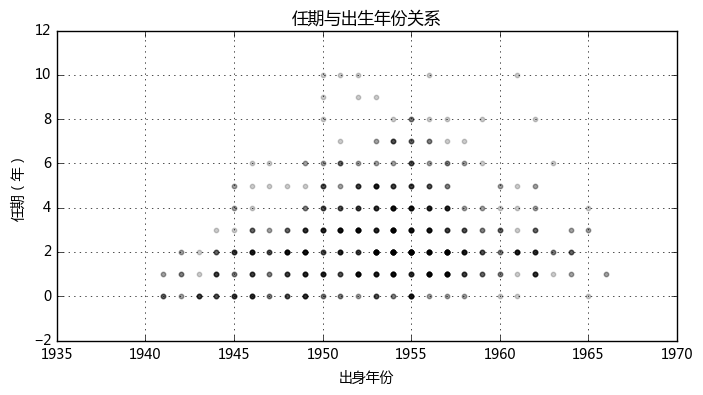

In [27]:
# 绘制图表1：任期与出生年份关系
    
fig_q3_1 = plt.figure(figsize = (8,4))
# 创建一个图表，大小为8*4

plt.scatter(data_term_fin['出生年份'],data_term_fin['任期'],color = 'black', alpha=0.2, s = 10)
plt.title('任期与出生年份关系')
plt.xlabel('出身年份')
plt.ylabel('任期（年）')
plt.grid(True)
plt.show()
# 创建散点图，aplha代表透明度 → 点颜色叠加，s代表点大小，
# 参数添加，grid添加网格
# plt.show()：显示图表

In [1]:
# 绘制图表2：任期与出生年份关系 - 热图

fig_q3_2 = plt.figure(figsize = (8,4))
# 创建一个图表，大小为8*4

df = pd.crosstab(data_term_fin['任期'], data_term_fin['出生年份'])
print(df.head())
print('----------')
# 整合数据

ax = fig_q3_2.add_subplot(111)
cax = ax.pcolor(df, cmap='Blues')
#cax = ax.matshow(df, cmap='Blues_r')
fig_q3_2.colorbar(cax)
plt.title('任期与出生年份关系 - 热图\n')
ax.set_xticklabels(data_term_fin['出生年份'].tolist())
plt.show()
# 创建热图，横坐标为出生年份，纵坐标为任期，

NameError: name 'plt' is not defined